In [1]:
!pip install keras

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [2]:
!pip install tensorflow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


2023-09-19 08:13:55.185537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


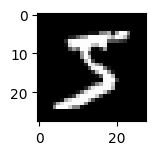

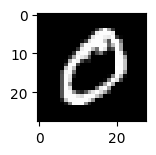

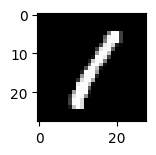

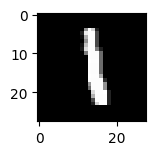

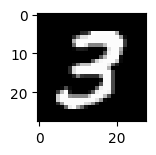

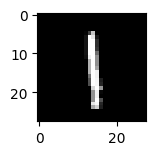

In [3]:
from keras.datasets import mnist
from matplotlib import pyplot
 
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 

 
#plotting
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [4]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
!pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(test_X.reshape((10000, 28*28)).T)

In [8]:
df_y = pd.DataFrame(test_y)

In [9]:
import numpy as np

In [10]:
def initializeWeights(layerDims):
    param = dict()
    
    for i in range(1, len(layerDims)):
        param["w"+str(i)] = np.random.randn(layerDims[i], layerDims[i-1]) * 0.01
        param["b"+str(i)] = np.zeros((layerDims[i], 1))

    return param
        

In [11]:
test = initializeWeights([4,3,3,1])
print(test)

{'w1': array([[ 5.93541879e-03,  1.81817329e-03, -7.47507322e-03,
        -7.28196714e-03],
       [-6.07684020e-04,  6.88148384e-04, -9.21755984e-03,
         1.86678873e-02],
       [-8.00911080e-05,  1.93511391e-02,  7.01543218e-03,
        -3.89853346e-03]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'w2': array([[-0.00235322,  0.0059659 , -0.0085651 ],
       [ 0.00619306,  0.00542604, -0.00708018],
       [ 0.00576515,  0.00653071,  0.01381353]]), 'b2': array([[0.],
       [0.],
       [0.]]), 'w3': array([[0.00067867, 0.00791993, 0.02019413]]), 'b3': array([[0.]])}


In [12]:
def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [13]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache


In [14]:
def linearForward(A, W, b):
    Z = np.dot(W, A) + b

    cache = (A, W, b)

    return Z, cache

In [15]:
def linearActivationForwardRelu(aPrev, W, b):
    Z, linearCache = linearForward(aPrev, W, b)
    A, activationCache = relu(Z)

    cache = (linearCache, activationCache)
    
    return A, cache

In [19]:
def linearActivationForwardSigmoid(aPrev, W, b):
    Z, linearCache = linearForward(aPrev, W, b)
    A, activationCache = sigmoid(Z)

    cache = (linearCache, activationCache)
    
    return A, cache

In [21]:
t_A, t_linear_activation_cache = linearActivationForwardRelu([[3], [3], [3], [3]], test["w1"], test["b1"])

In [22]:
print(t_A)

[[0.        ]
 [0.02859238]
 [0.06716384]]


In [23]:
def forwardProp(X, param):
    A = X
    caches = []
    L = len(param)//2

    for l in range(1, L):
        A_prev = A
        A, cache = linearActivationForwardRelu(A_prev, param["w"+str(l)], param["b"+str(l)])
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)

    return AL, cache

In [24]:
def computeCost(AL, Y):
    m = Y.shape[1]
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    np.squeeze(cost)

    return cost

In [25]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [26]:
def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [27]:
def linearBackward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [28]:
def linearActivationBackwardRelu(dA, cache, activation):
    dZ = relu_backward(dA, cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [29]:
def linearActivationBackwardSigmoid(dA, cache, activation):
    dZ = sigmoid_backward(dA, cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [30]:
def modelBackward(AL, Y, cache):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linearActivationBackwardRelu(grads["dA" + str(l + 1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [31]:
def updateParameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

In [34]:
def modelFit(X, Y, layerDims, epochs, learning_rate):
    param = initializeWeights(layerDims)

    for i in range(epochs):
        AL, cache = forwardProp(X, param)
        cost = computeCost(AL, Y)

        grads = modelBackward(AL, Y, cache)
        param = updateParameters(param, grads, learning_rate)

    return param

In [48]:
def predict(param, X):
    AL, cache = forwardProp(X, param)
    pred = 0
    if AL >= 0.5:
        pred = 1
    
    return AL

In [49]:
import h5py

In [62]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [63]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

OSError: Unable to open file (file signature not found)